# Assignment 1: Comparison of Regression Models on Predicting Medical Costs

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![Medical Cost](https://creditkarma-cms.imgix.net/wp-content/uploads/2018/04/boomers-gen-x-high-cost-medical-care.jpg)
In this assignment, you will implement some learning models in the context of a **regression** problem in the [Medical Cost Personal Dataset on Kaggle](https://www.kaggle.com/mirichoi0218/insurance). Specifically, you will attempt to predict the medical cost billed by health insurance using other provided patient's data. For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same folder as this file.

For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.


***
##  Task 1: SEE THE BIG PICTURE
Write a paragraph explaining the context of the problem in which you are trying to investigate. We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing value?
 * What are some basic statistics you can learn right away about this dataset?

In [68]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.

# Here I load the data

DATA_PATH = 'data/insurance.csv'

df = pd.read_csv(DATA_PATH)

## Paragraph:

- The problem we are tackling here in Assignment 1 is implementing our own in house regression model and learning algorithm to predict a numerical value which is 'charges' in the above data set. We will implement both a simple linear regression model as well as a more sophisticated gradient descent model. We will use the other columns of the dataset as features that will be used to predict the label 'charges'. Linear algebra and dot product notation is our friend here.

In [7]:
""" File Size: """

import os

print(f"The File is {os.path.getsize(DATA_PATH)} Bytes in Size")

The File is 55628 Bytes in Size


In [11]:
"""
How Many Entries: 
"""
df.shape[0]

1338

In [12]:
""" 
How Many Features?

7 including the target label, 6 are predictors and 1 is the predicted

"""

df.shape[1]

7

In [53]:
"""
Does it contain any categorical data?

Yes, the features sex, smoker, and region are categorical data types.

"""

df_cat = df.select_dtypes(include=['object', 'category'])
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     1338 non-null   object
 1   smoker  1338 non-null   object
 2   region  1338 non-null   object
dtypes: object(3)
memory usage: 31.5+ KB


In [19]:
"""
Does it Contain any Missing Values?

No, all values are valid

"""
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [23]:
"""
Some basic statistics of numerical columns:
"""

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [54]:
"""
Some basic statistics of categorical columns:
"""
df_cat.describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

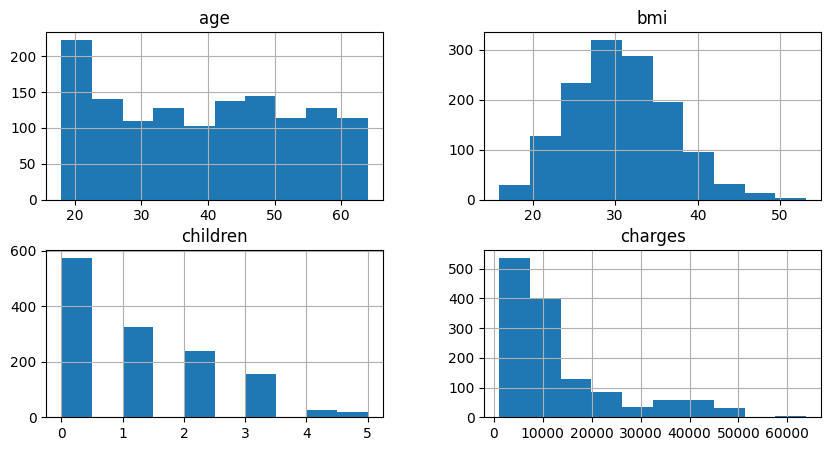

In [43]:
df.hist(bins=10, figsize=(10,5))

---
##  Task 2: DATA DISCOVERY, CLEANING, AND SCALING

**Data Discover:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class.

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

**Implementation Note:** You will need to integrate the above operations into a Pipeline to process and transform the training data, then use the same pipeline to transform any validation and testing data.

In [40]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

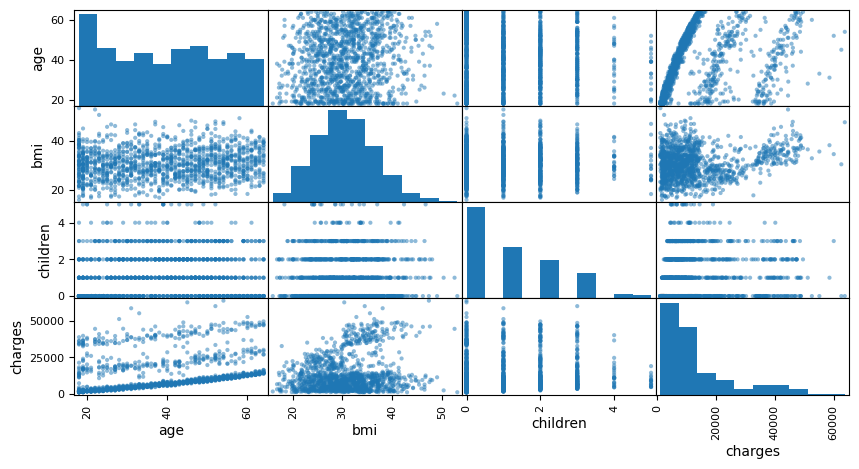

In [44]:
scatter_matrix(df, figsize=(10,5))
plt.show()

In [ ]:
"""
No Missing Values to Impute
"""

In [167]:
"""
Feature Encoding, Need to convert values to numerical using one_hot_encoding:

"""

def loadData():
    return pd.read_csv(DATA_PATH)

class MyPipeline:

    def fit_transform(self, df):
        cols_to_encode = df.select_dtypes(include=['object', 'category']).columns
        
        encoder = OneHotEncoder(sparse_output = False, drop="first")
        
        encoded_columns = encoder.fit_transform(df[cols_to_encode])
        
        encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(cols_to_encode))
        
        df_num = df.drop(columns = cols_to_encode)
        
        df_transformed = pd.concat([df_num, encoded_df], axis=1)

        df_target = df_transformed['charges']
        df_transformed.drop(columns='charges', inplace=True)

        #normalize all features but the target
        for feature in df_transformed.columns:
            df_transformed[feature] = (df_transformed[feature] - df_transformed[feature].mean())/df_transformed[feature].std()

        return df_transformed, df_target

In [168]:
df = loadData()

pipeline = MyPipeline()

X, y= pipeline.fit_transform(df)

In [170]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438227,-0.453151,-0.908274,-1.010141,1.969850,-0.566206,-0.611095,1.764821
1,-1.509401,0.509431,-0.078738,0.989221,-0.507273,-0.566206,1.635183,-0.566206
2,-0.797655,0.383164,1.580335,0.989221,-0.507273,-0.566206,1.635183,-0.566206
3,-0.441782,-1.305043,-0.908274,0.989221,-0.507273,1.764821,-0.611095,-0.566206
4,-0.512957,-0.292447,-0.908274,0.989221,-0.507273,1.764821,-0.611095,-0.566206


In [171]:
X.shape

(1338, 8)

In [176]:
"""
Data is prepared, time to split for train, test, and validation

first 200 rows saved as holdout rows
"""


X_validation = X[0:200].copy()
y_validation = y[0:200].copy()

# Your code goes here for this section.
X_train = X[200:1000].copy()
y_train = y[200:1000].copy()
X_test = X[1000:1339].copy()
y_test = y[1000:1339].copy()

- - -
## Task 3. IMPLEMENT GRADIENT DESCENT
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **MyLinearRegression** class and its predefined methods.

**Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code is well-vectorized.

In [268]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = [] with value from your implementation

class MyLinearRegression:
  """
  Define what a linear regressor can do
  """

  def __init__ (self, type="linear", theta=[], alpha=0.1, num_iters=100, cost="MSE"):
    """
    Initialize the regressor
    """
    self.type=type #type purely for the predict method
    self.theta = theta; # parameter vector;
    self.alpha = alpha; # learning rate
    self.num_iters = num_iters #number of iterations
    self.cost  = cost; # cost function

  def fitUsingGradientDescent(self, X_train, y_train):
    """
    Train the regressor using gradient descent
    """
    trained_theta, cost_history= self.gradientDescent(X_train, y_train, self.theta, self.alpha, self.num_iters)

    self.theta = trained_theta

    return cost_history, self.theta
    
  def fitUsingNormalEquation(self, X_train, y_train):
    """
    Training using the Normal (close form) equation
    """
    # implementation code here for Task 4.

    X_train_matrix = X_train.values

    X_train_matrix = np.hstack((np.ones((X_train_matrix.shape[0], 1)), X_train_matrix))

    y_train_matrix = y_train.values
      
    self.theta = np.linalg.inv(X_train_matrix.T.dot(X_train_matrix)).dot(X_train_matrix.T).dot(y_train_matrix)

  def gradientDescent(self, X_train, y_train, theta, alpha, iters):
    """
    Implementatation of the gradient descent
    INPUT:
    alpha: the learning rate
    iters: number of iterations

    OUTPUT:
    theta: updated value for theta
    cost: value of the cost function
    """
    # implementation code here

    m = len(X_train)
    X_train_matrix = X_train.values
    y_train_matrix = y_train.values
    cost_history = []
      
    for iteration in range(iters):
        
        #here we save the MSE at each iteration to create a cost history
        predictions = X_train_matrix.dot(theta)
        error = predictions - y_train_matrix
        cost = (1 / (2 * m)) * np.sum(error**2)
        cost_history.append(cost)

        #here we compute the slopes and update theta
        gradients = 2/m * X_train_matrix.T.dot(X_train_matrix.dot(theta) - y_train_matrix)
        theta = theta - alpha * gradients

    if self.cost == "RMSE":
        cost_history = np.sqrt(cost_history)

    return theta, cost_history


  def predict(self, X_test):
    """
    Predicting the label
    """
    # implementation code here
    X_test_matrix = X_test.values

    #add the column of 1's for linear regression
    if self.type=="linear":
        X_test_matrix = np.hstack((np.ones((X_test_matrix.shape[0], 1)), X_test_matrix))
        
    
    return X_test_matrix.dot(self.theta)

  def __str__(self):
    """
    Print out the parameter out when call print()
    """
    # implement here to return("Parameter vector is %f" % self.theta)   }
    print(f"Here is the parameter vector for the current model: \n {self.theta}")

# Your code goes here to call the instance of class Mynum_features = len(X_train.columns)


#prepare hyperparameters
num_iterations = 100
alpha=.1
num_features = X_train.shape[1]
theta = np.random.randn(num_features)
cost_func = "RMSE"

model = MyLinearRegression(type="gradient", theta=theta, alpha=alpha, num_iters=num_iterations, cost=cost_func)

cost_history, theta = model.fitUsingGradientDescent(X_train, y_train)

In [269]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(model.predict(X_test), y_test))

15387.73636447025

* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

'\nDecided on alpha = 0.1 based on my plotting, middle graph has best results! 2.5 is dramatically overfit and .005 is underfit\n'

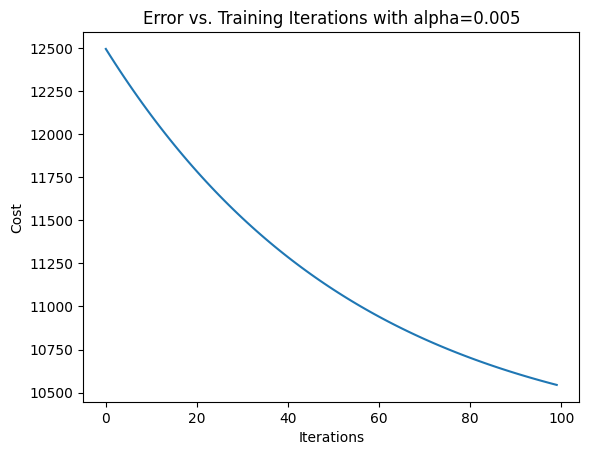

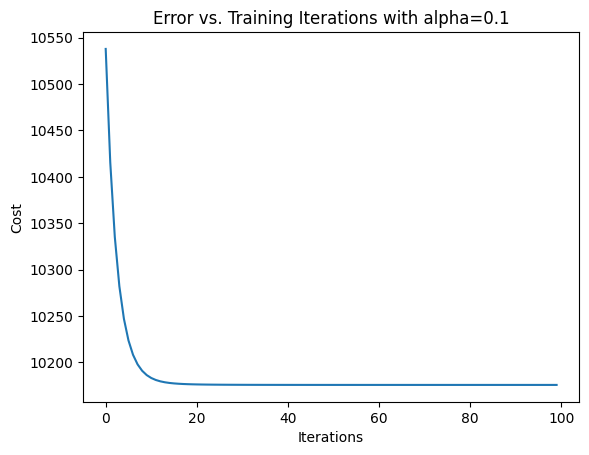

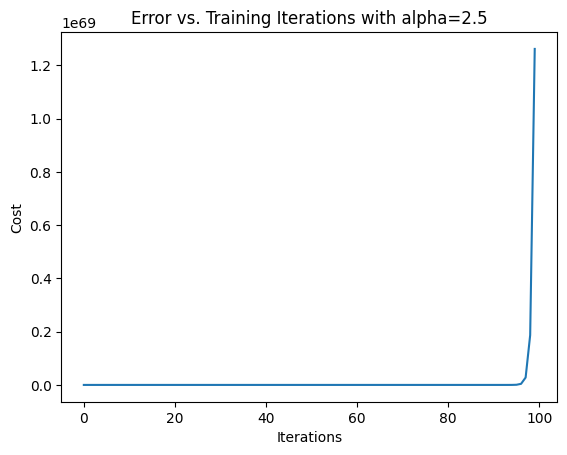

In [270]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You must plot multiple curves corresponding to different learning rates to justify the best one.
#
import matplotlib.pyplot as plt

def plot_cost_vs_iterations(alpha, num_iterations, cost_history):
    iterations = range(num_iterations)
    fig, ax = plt.subplots()
    plt.plot(iterations, cost_history)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title(f'Error vs. Training Iterations with alpha={alpha}')
    return fig


potential_alphas = [0.005,0.1,2.5]
num_iterations = 100
num_features = X_train.shape[1]
theta = np.random.randn(num_features)
cost_func = "RMSE"

figures = []

for alpha in potential_alphas:
    model = MyLinearRegression(theta=theta, alpha=alpha, num_iters=num_iterations, cost=cost_func)
    cost_history, theta = model.fitUsingGradientDescent(X_train, y_train)

    plot_cost_vs_iterations(alpha, num_iterations, cost_history)


"""
Decided on alpha = 0.1 based on my plotting, middle graph has best results! 2.5 is dramatically overfit and .005 is underfit
"""


- - -
## Task 4. IMPLEMENT THE NORMAL EQUATION

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement:

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [274]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:

num_features = X_train.shape[1]

rand_theta = np.random.randn(num_features)

myNormalEquationModel = MyLinearRegression(theta=rand_theta)
myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)

predictions = myNormalEquationModel.predict(X_test)

np.sqrt(mean_squared_error(predictions, y_test))

6443.377296160178

- - -
## Task 5. COMPARE DIFFERENT IMPLEMENTATIONS

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you must use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the RMSE on the **test set** as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
* What is your assessment of the error? Good? Okay? Terrible?

In [ ]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
#mySGDModel.fit(X_train,y_train)
#y_predict = mySGDModel.predict(X_test)
#mse = mean_squared_error(y_test, y_predict)
#mySGDModel_rmse = np.sqrt(mse)
# print(mySGDModel_rmse)

# myGradientDescentModel_rmse
# myNormalEquationModel_rmse



- - -
## Task 6. PRESENT YOUR SOLUTION

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution.

In [ ]:
# Your paragraph goes here for this section

- - -
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](http://bit.ly/cs4774oh)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 1:...".

Best of luck and have fun!